In [1]:
import os
from cv2 import cv2
from models.Pix2Pix import Pix2Pix
from torchvision.transforms import transforms
import torch
from torch.utils.data import DataLoader
from models.PlateDataModule import PlateDataset

DATA_PATH = 'data/plates/test/'
BATCH_SIZE = 64 + 32
NUM_WORKERS = int(os.cpu_count() / 2)
PATCH = (1, 256 // 2 ** 4, 256 // 2 ** 4)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = Pix2Pix(batch_size=BATCH_SIZE, patch=PATCH).load_from_checkpoint('saving_ckpt/pix2pix_epoch=68-g_loss=15.212.ckpt').to(device).eval()

In [2]:
test_dl = DataLoader(PlateDataset(DATA_PATH), batch_size=BATCH_SIZE, shuffle=True)

# 가짜 이미지 생성
with torch.no_grad():
    for a, b in test_dl:
        fake_imgs = model.generator(a.to(device)).detach().cpu()
        real_imgs = a
        break

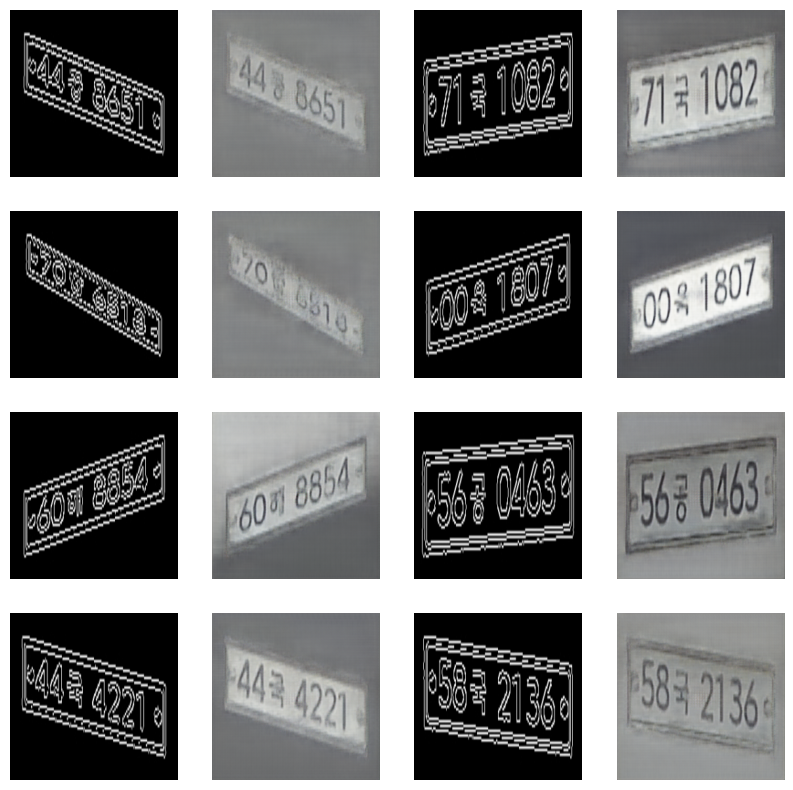

In [3]:
from torchvision.transforms.functional import to_pil_image
from matplotlib import pyplot as plt

# 가짜 이미지 시각화
plt.figure(figsize=(10, 10))

for ii in range(0, 16, 2):
    plt.subplot(4, 4, ii + 1)
    plt.imshow(to_pil_image(0.5 * real_imgs[ii] + 0.5))
    plt.axis('off')
    plt.subplot(4, 4, ii + 2)
    plt.imshow(to_pil_image(0.5 * fake_imgs[ii] + 0.5))
    plt.axis('off')